In [2]:
pip install pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 878.6 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 3.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.3/20.3 MB 5.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 1.5 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 6.2 MB/s eta 0:00:00:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.9/158.9 kB 2.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 5.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.3/259.3 kB 5.4 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 8.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 5.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 2.6 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 1.9 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
import seaborn as sns

In [8]:
df = pd.read_csv('/Users/sachacollinson/Downloads/fake_transactional_data_24.csv')


In [9]:
df = df.rename(columns={"from_totally_fake_account": "AccountNumber", "monopoly_money_amount": "MoneyTransferAmount", "to_randomly_generated_account": "TransferredLocationAccount", "not_happened_yet_date": "TransactionDate"})
# from_totally_fake_account  = AccountNumber
# monopoly_money_amount = MoneyTransferAmount
# to_randomly_generated_account = TransferredLocationAccount
# not_happened_yet_date = TransactionDate

In [10]:
print(df.head())

   AccountNumber  MoneyTransferAmount TransferredLocationAccount  \
0        10371.0                 4.00                     CINEMA   
1        88339.0                 2.40                      40544   
2        18555.0                 2.40                      85149   
3        18555.0                 4.10        HIPSTER_COFFEE_SHOP   
4        80792.0                 1.95                      18555   

  TransactionDate  
0      01/01/2025  
1      01/01/2025  
2      01/01/2025  
3      01/01/2025  
4      01/01/2025  


Calculate Number of Sources

In [11]:
number_of_sources = df['AccountNumber'].nunique()
number_of_sources

8142

Calculate total payments made by each source - show the distribution, mean, interquartile range and 5% and 95% points for this data to categorise how the total spending of customers is distributed

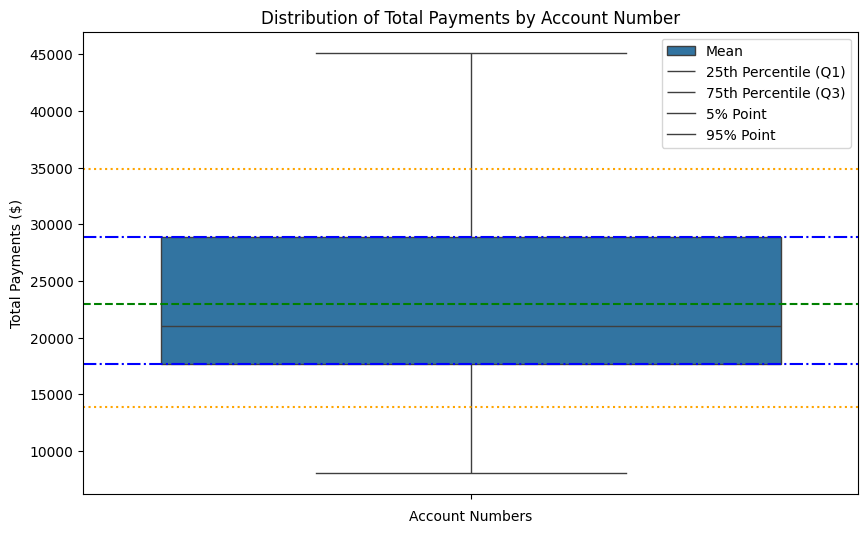

(      AccountNumber  MoneyTransferAmount
 0            1000.0             28698.51
 1            1002.0             15622.97
 2            1006.0             18778.19
 3            1018.0             15612.21
 4            1053.0             19444.57
 ...             ...                  ...
 8137       100931.0             22332.81
 8138       100934.0             18579.25
 8139       100947.0             20783.20
 8140       100986.0             15314.23
 8141       100988.0             19714.77
 
 [8142 rows x 2 columns],
 count     8142.000000
 mean     22925.845676
 std       6811.697500
 min       8079.130000
 5%       13914.371000
 25%      17699.610000
 50%      21021.590000
 75%      28918.547500
 95%      34876.482500
 max      45141.370000
 Name: MoneyTransferAmount, dtype: float64,
 11218.9375,
 13914.371000000001,
 34876.4825)

In [18]:
# Calculate total payments made by each AccountNumber
total_payments_by_account = df.groupby('AccountNumber')['MoneyTransferAmount'].sum().reset_index()

# Calculate the distribution statistics
distribution_stats = total_payments_by_account['MoneyTransferAmount'].describe(percentiles=[.05, .25, .5, .75, .95])

# Extracting the interquartile range
iqr = distribution_stats['75%'] - distribution_stats['25%']

# Extracting the 5% and 95% points
five_percent_point = distribution_stats['5%']
ninety_five_percent_point = distribution_stats['95%']

# Setting up the matplotlib figure
plt.figure(figsize=(10, 6))

# Boxplot to show the distribution of payments
sns.boxplot(data=total_payments_by_account, y='MoneyTransferAmount')
plt.title('Distribution of Total Payments by Account Number')
plt.ylabel('Total Payments ($)')
plt.xlabel('Account Numbers')

# Add individual points to show actual payments
#sns.stripplot(data=total_payments_by_account, y='MoneyTransferAmount', color='red', jitter=0.1, size=8)

# Show the mean and IQR explicitly on the plot
plt.axhline(distribution_stats['mean'], color='green', linestyle='--')
plt.axhline(distribution_stats['25%'], color='blue', linestyle='-.')
plt.axhline(distribution_stats['75%'], color='blue', linestyle='-.')

# Annotate the 5% and 95% points on the plot
plt.axhline(five_percent_point, color='orange', linestyle=':')
plt.axhline(ninety_five_percent_point, color='orange', linestyle=':')

# Adding legend for mean and IQR lines
plt.legend(['Mean', '25th Percentile (Q1)', '75th Percentile (Q3)', '5% Point', '95% Point'], loc='upper right')

# Show the plot
plt.show()
total_payments_by_account, distribution_stats, iqr, five_percent_point, ninety_five_percent_point

Calculate number of payments made by each source - show distribution mean etc for this statistic

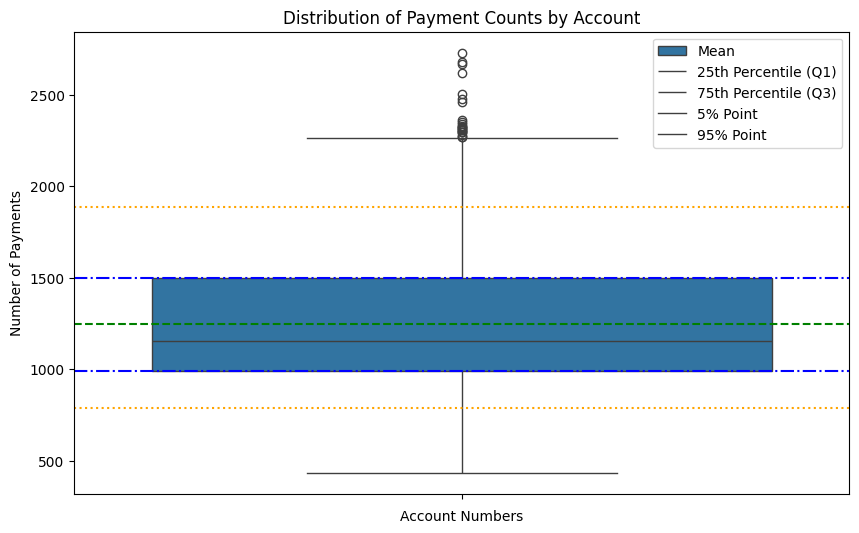

In [23]:
payments_count_by_account = df.groupby('AccountNumber')['MoneyTransferAmount'].count().reset_index(name='NumberOfPayments')
# Calculate the distribution statistics
count_distribution_stats = payments_count_by_account['NumberOfPayments'].describe(percentiles=[.05, .25, .5, .75, .95])

# Extracting the interquartile range
iqr = count_distribution_stats['75%'] - count_distribution_stats['25%']

# Extracting the 5% and 95% points
five_percent_point = count_distribution_stats['5%']
ninety_five_percent_point = count_distribution_stats['95%']

# Setting up the matplotlib figure for the number of payments by account
plt.figure(figsize=(10, 6))

# Create a boxplot to show the distribution of payment counts by account
sns.boxplot(data=payments_count_by_account, y='NumberOfPayments')
plt.title('Distribution of Payment Counts by Account')
plt.ylabel('Number of Payments')
plt.xlabel('Account Numbers')

# Add individual points to show actual number of payments
#sns.stripplot(data=payments_count_by_account, y='NumberOfPayments', color='red', jitter=0.1, size=8)

# Show the mean and IQR explicitly on the plot
plt.axhline(count_distribution_stats['mean'], color='green', linestyle='--')
plt.axhline(count_distribution_stats['25%'], color='blue', linestyle='-.')
plt.axhline(count_distribution_stats['75%'], color='blue', linestyle='-.')

# Annotate the 5% and 95% points on the plot
plt.axhline(five_percent_point, color='orange', linestyle=':')
plt.axhline(ninety_five_percent_point, color='orange', linestyle=':')

# Adding legend for mean and IQR lines
plt.legend(['Mean', '25th Percentile (Q1)', '75th Percentile (Q3)', '5% Point', '95% Point'], loc='upper right')

# Show the plot
plt.show()

For each Source calculate the mean payment - show distribution etc of this statistic

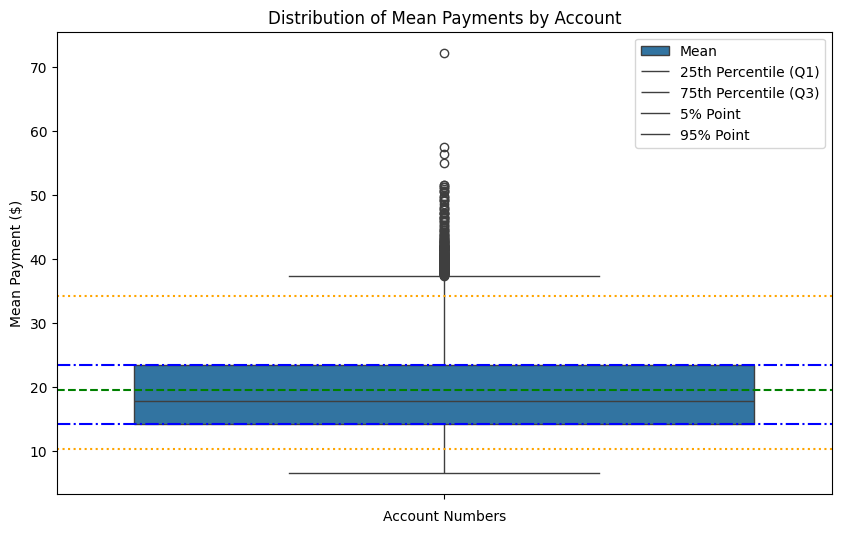

In [27]:
# Calculating the mean payment for each account
mean_payments_by_account = df.groupby('AccountNumber')['MoneyTransferAmount'].mean().reset_index(name='MeanPayment')

# Calculating the distribution statistics for the mean payments
mean_payments_distribution_stats = mean_payments_by_account['MeanPayment'].describe(percentiles=[.05, .25, .5, .75, .95])

# Extracting the 5% and 95% points
five_percent_point = mean_payments_distribution_stats['5%']
ninety_five_percent_point = mean_payments_distribution_stats['95%']
# Setting up the matplotlib figure for the mean payments by account
plt.figure(figsize=(10, 6))

# Create a boxplot to show the distribution of mean payments by account
sns.boxplot(data=mean_payments_by_account, y='MeanPayment')
plt.title('Distribution of Mean Payments by Account')
plt.ylabel('Mean Payment ($)')
plt.xlabel('Account Numbers')

# Add individual points to show actual mean payments
#sns.stripplot(data=mean_payments_by_account, y='MeanPayment', color='red', jitter=0.1, size=8)

# Show the mean and IQR explicitly on the plot
plt.axhline(mean_payments_distribution_stats['mean'], color='green', linestyle='--')
plt.axhline(mean_payments_distribution_stats['25%'], color='blue', linestyle='-.')
plt.axhline(mean_payments_distribution_stats['75%'], color='blue', linestyle='-.')

# Annotate the 5% and 95% points on the plot
plt.axhline(five_percent_point, color='orange', linestyle=':')
plt.axhline(ninety_five_percent_point, color='orange', linestyle=':')

# Adding legend for mean and IQR lines
plt.legend(['Mean', '25th Percentile (Q1)', '75th Percentile (Q3)', '5% Point', '95% Point'], loc='upper right')

# Show the plot
plt.show()

Plot mean spend vs total spend and mean spend vs number of payments

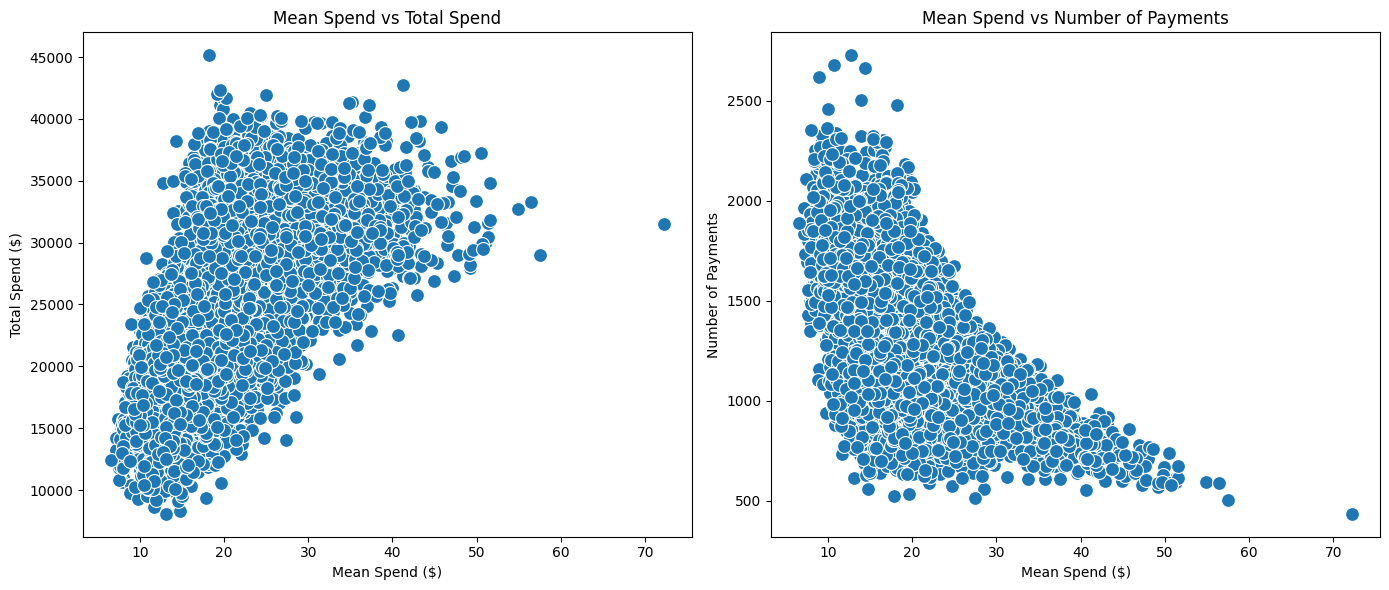

In [29]:
# We need to merge the mean payments and total payments dataframes to plot them against each other
mean_vs_total = pd.merge(mean_payments_by_account, total_payments_by_account, on='AccountNumber')

# We also need to merge the mean payments and payments count dataframes for the other plot
mean_vs_count = pd.merge(mean_payments_by_account, payments_count_by_account, on='AccountNumber')

# Setting up the matplotlib figure
plt.figure(figsize=(14, 6))

# First subplot for Mean Spend vs Total Spend
plt.subplot(1, 2, 1)
sns.scatterplot(data=mean_vs_total, x='MeanPayment', y='MoneyTransferAmount', s=100)
plt.title('Mean Spend vs Total Spend')
plt.xlabel('Mean Spend ($)')
plt.ylabel('Total Spend ($)')

# Second subplot for Mean Spend vs Number of Payments
plt.subplot(1, 2, 2)
sns.scatterplot(data=mean_vs_count, x='MeanPayment', y='NumberOfPayments', s=100)
plt.title('Mean Spend vs Number of Payments')
plt.xlabel('Mean Spend ($)')
plt.ylabel('Number of Payments')

# Show the plot with a tight layout
plt.tight_layout()
plt.show()

Calculate number of Recipients for each Source and show distribution etc for this statistic. Plot Number of recipients per source against mean spend per Source and total spend per Source

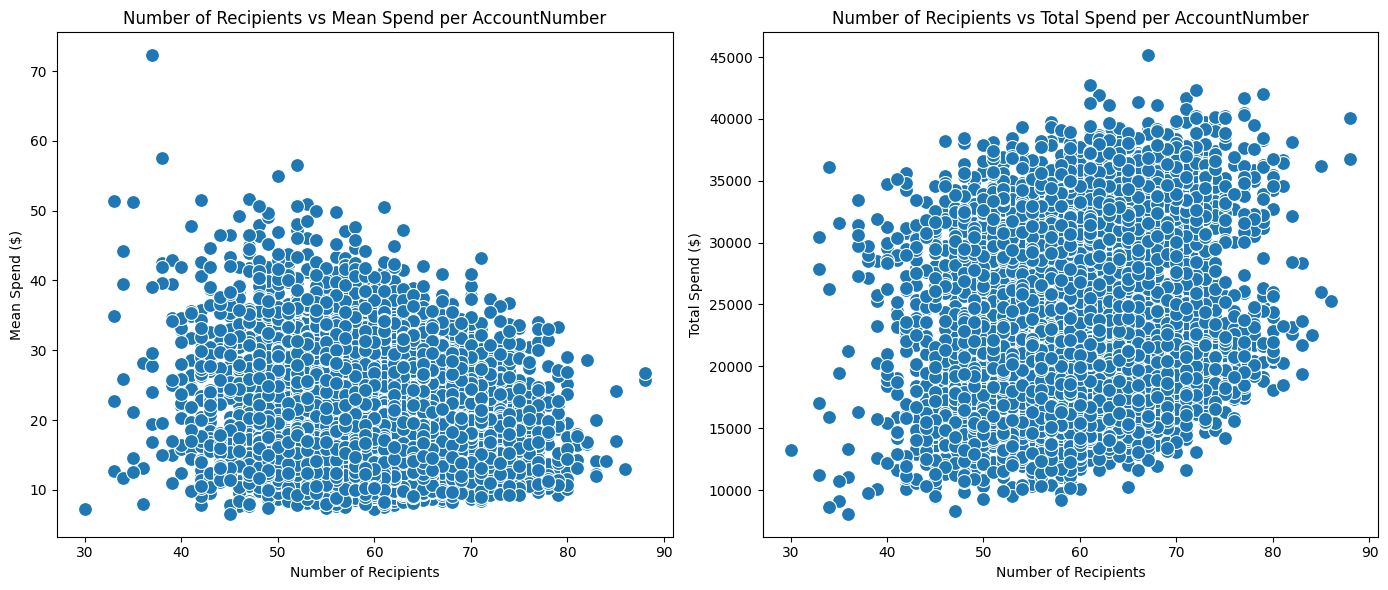

(      AccountNumber  NumberOfRecipients
 0            1000.0                  65
 1            1002.0                  63
 2            1006.0                  65
 3            1018.0                  55
 4            1053.0                  73
 ...             ...                 ...
 8137       100931.0                  75
 8138       100934.0                  59
 8139       100947.0                  71
 8140       100986.0                  65
 8141       100988.0                  66
 
 [8142 rows x 2 columns],
 count    8142.000000
 mean       60.299681
 std         7.611649
 min        30.000000
 5%         48.000000
 25%        55.000000
 50%        61.000000
 75%        65.000000
 95%        72.000000
 max        88.000000
 Name: NumberOfRecipients, dtype: float64)

In [30]:
# Calculate the number of unique recipients (TransferredLocationAccount) for each AccountNumber
number_of_recipients = df.groupby('AccountNumber')['TransferredLocationAccount'].nunique().reset_index(name='NumberOfRecipients')

# Calculate the distribution statistics for the number of recipients
recipients_distribution_stats = number_of_recipients['NumberOfRecipients'].describe(percentiles=[.05, .25, .5, .75, .95])

# We need to merge the number of recipients with mean payments and total payments dataframes for plotting
recipients_vs_mean_spend = pd.merge(number_of_recipients, mean_payments_by_account, on='AccountNumber')
recipients_vs_total_spend = pd.merge(number_of_recipients, total_payments_by_account, on='AccountNumber')

# Setting up the matplotlib figure
plt.figure(figsize=(14, 6))

# First subplot for Number of Recipients vs Mean Spend
plt.subplot(1, 2, 1)
sns.scatterplot(data=recipients_vs_mean_spend, x='NumberOfRecipients', y='MeanPayment', s=100)
plt.title('Number of Recipients vs Mean Spend per AccountNumber')
plt.xlabel('Number of Recipients')
plt.ylabel('Mean Spend ($)')

# Second subplot for Number of Recipients vs Total Spend
plt.subplot(1, 2, 2)
sns.scatterplot(data=recipients_vs_total_spend, x='NumberOfRecipients', y='MoneyTransferAmount', s=100)
plt.title('Number of Recipients vs Total Spend per AccountNumber')
plt.xlabel('Number of Recipients')
plt.ylabel('Total Spend ($)')

# Show the plot with a tight layout
plt.tight_layout()
plt.show()

number_of_recipients, recipients_distribution_stats

Look at date distribution of payments per source ie by day of the week, week of the month, month of the year  ie do sources have a favourite max spend day/week/month ?

In [35]:
# First, we need to convert the 'TransactionDate' to datetime format to extract day of the week, week of the month, and month of the year
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], format='%d/%m/%Y')

# Extracting day of the week, week of the month, and month of the year
df['DayOfWeek'] = df['TransactionDate'].dt.day_name()
df['WeekOfMonth'] = df['TransactionDate'].apply(lambda x: (x.day-1) // 7 + 1)
df['MonthOfYear'] = df['TransactionDate'].dt.month_name()

# Calculate the max spend by day of the week for each AccountNumber
max_spend_day = df.groupby(['AccountNumber', 'DayOfWeek'])['MoneyTransferAmount'].max().reset_index()

# Calculate the max spend by week of the month for each AccountNumber
max_spend_week = df.groupby(['AccountNumber', 'WeekOfMonth'])['MoneyTransferAmount'].max().reset_index()

# Calculate the max spend by month of the year for each AccountNumber
max_spend_month = df.groupby(['AccountNumber', 'MonthOfYear'])['MoneyTransferAmount'].max().reset_index()

max_spend_day.head(), max_spend_week.head(), max_spend_month.head(), df.head()

(   AccountNumber DayOfWeek  MoneyTransferAmount
 0         1000.0    Friday               1325.0
 1         1000.0    Monday                 68.0
 2         1000.0  Saturday                 92.0
 3         1000.0    Sunday               1125.0
 4         1000.0  Thursday                145.0,
    AccountNumber  WeekOfMonth  MoneyTransferAmount
 0         1000.0            1              1960.00
 1         1000.0            2              1215.00
 2         1000.0            3              1740.00
 3         1000.0            4              1565.00
 4         1000.0            5                29.39,
    AccountNumber MonthOfYear  MoneyTransferAmount
 0         1000.0       April               1000.0
 1         1000.0      August               1320.0
 2         1000.0    December               1215.0
 3         1000.0    February               1740.0
 4         1000.0     January               1670.0,
    AccountNumber  MoneyTransferAmount TransferredLocationAccount  \
 0        10371.

/var/folders/2l/zb5_xmsx54x0g2sb6y63xcsw0000gn/T/ipykernel_51746/3658784119.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DayOfWeek', y='MoneyTransferAmount', data=max_spend_day_agg, ax=axs[0], palette="coolwarm")
/var/folders/2l/zb5_xmsx54x0g2sb6y63xcsw0000gn/T/ipykernel_51746/3658784119.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='WeekOfMonth', y='MoneyTransferAmount', data=max_spend_week_agg, ax=axs[1], palette="coolwarm")
/var/folders/2l/zb5_xmsx54x0g2sb6y63xcsw0000gn/T/ipykernel_51746/3658784119.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for

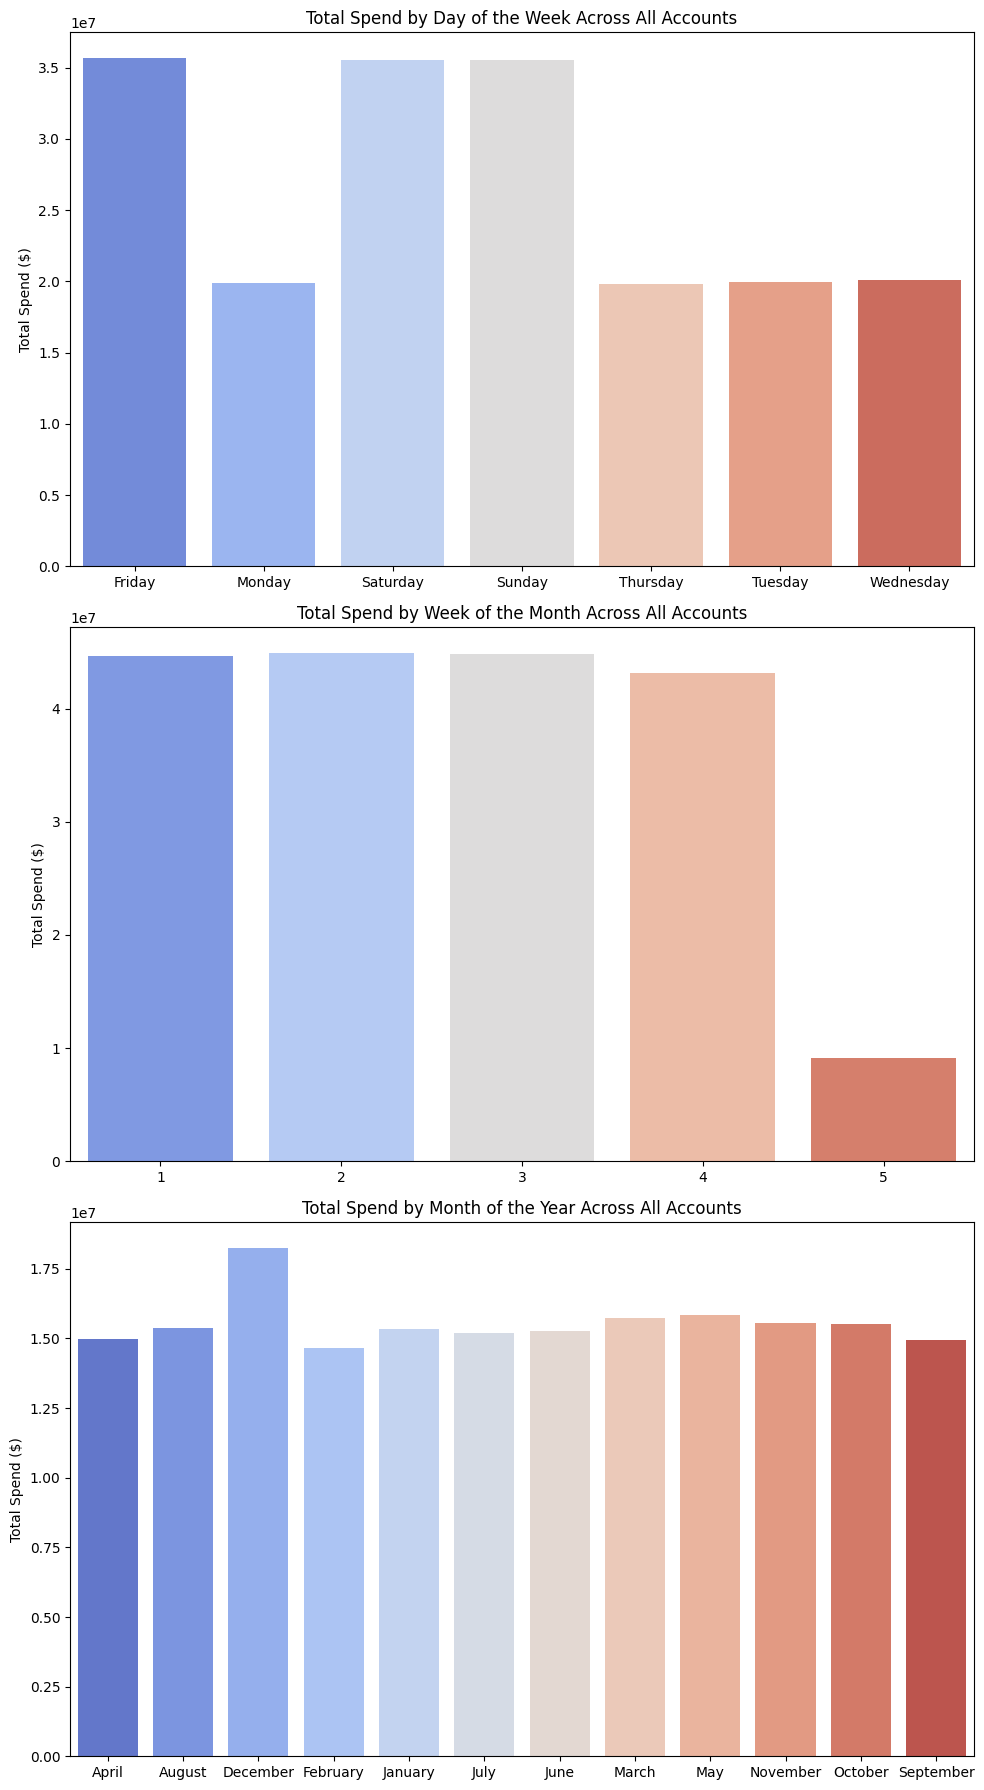

In [37]:
# Re-applying the dataset preparation including the necessary columns
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], format='%d/%m/%Y')
df['DayOfWeek'] = df['TransactionDate'].dt.day_name()
df['WeekOfMonth'] = df['TransactionDate'].apply(lambda x: (x.day-1) // 7 + 1)
df['MonthOfYear'] = df['TransactionDate'].dt.month_name()

# Re-aggregating the data
max_spend_day_agg = df.groupby('DayOfWeek')['MoneyTransferAmount'].sum().reset_index()
max_spend_week_agg = df.groupby('WeekOfMonth')['MoneyTransferAmount'].sum().reset_index()
max_spend_month_agg = df.groupby('MonthOfYear')['MoneyTransferAmount'].sum().reset_index()

# Plotting the aggregated data
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

# Max Spend by Day of the Week
sns.barplot(x='DayOfWeek', y='MoneyTransferAmount', data=max_spend_day_agg, ax=axs[0], palette="coolwarm")
axs[0].set_title('Total Spend by Day of the Week Across All Accounts')
axs[0].set_xlabel('')
axs[0].set_ylabel('Total Spend ($)')

# Max Spend by Week of the Month
sns.barplot(x='WeekOfMonth', y='MoneyTransferAmount', data=max_spend_week_agg, ax=axs[1], palette="coolwarm")
axs[1].set_title('Total Spend by Week of the Month Across All Accounts')
axs[1].set_xlabel('')
axs[1].set_ylabel('Total Spend ($)')

# Max Spend by Month of the Year
sns.barplot(x='MonthOfYear', y='MoneyTransferAmount', data=max_spend_month_agg, ax=axs[2], palette="coolwarm")
axs[2].set_title('Total Spend by Month of the Year Across All Accounts')
axs[2].set_xlabel('')
axs[2].set_ylabel('Total Spend ($)')

plt.tight_layout()
plt.show()